# Contrastive learning density estimation

Author: Christoph Weniger, June 2020

In [1]:
import numpy as np
import pylab as plt
import swyft
import torch

In [2]:
DEVICE = 'cuda:0'
NDIM = 10  # Dimensionality of parameter z
NROUNDS = 1  # Optimization rounds

In [3]:
# Generative model, x~p(x|z)
def model(z, sigma = 0.1):
    x = z
    n = np.random.randn(*x.shape)*sigma
    return x + n

In [4]:
z0 = np.ones(NDIM)*0.6
x0 = model(z0, sigma = 1e-6)
x0.shape

(10,)

In [5]:
sw = swyft.SWYFT(model, NDIM, x0, device = DEVICE)

In [6]:
for i in range(NROUNDS):
    sw.round(n_sims = 10000, n_train = [1000,1000,1000], lr = [1e-3,1e-4,1e-5], n_batch = 10, p = 0.0)

100%|██████████| 10000/10000 [00:00<00:00, 96328.66it/s]

Round:  0
Generate samples from constrained prior: z~pc(z)
Generate corresponding draws x ~ p(x|z)



  0%|          | 0/1000 [00:00<?, ?it/s]

Network optimization


100%|██████████| 1000/1000 [01:24<00:00, 11.79it/s]


In [9]:
post = []
for i in range(NROUNDS):
    post.append(sw.get_posteriors(nround=i))

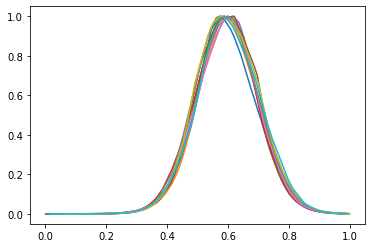

In [10]:
for i in range(NROUNDS):
    for j in range(NDIM):
        plt.plot(post[i][j]['z'], np.exp(post[i][j]['lnL']), label=i)
        #plt.plot(post[i][0]['z'], post[i][0]['lnL'], label=i)
#plt.legend()
#plt.xlim([0.45, 0.55])
#plt.ylim([-5, 0])